<h1> topic-titanic dataset</h1>

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

<h2>Reading dataset</h2>

In [4]:
dataset=pd.read_csv("Titanic-Dataset.csv")
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<h2>basic information</h2>

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
dataset.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
dataset.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<h2>filling the null value</h2> 

In [8]:
#age  countinious numerical hai , so that we filled it by median
dataset["Age"].fillna(dataset["Age"].median(),inplace=True)

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_7724\2018918296.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset["Age"].fillna(dataset["Age"].median(),inplace=True)


In [9]:
#drop due to many missing value
dataset.dropna(subset=["Cabin"],inplace=True)

In [10]:
#using mode becuse of object
dataset["Embarked"].fillna(dataset["Embarked"].mode()[0],inplace=True,)

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_7724\3538295369.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset["Embarked"].fillna(dataset["Embarked"].mode()[0],inplace=True,)


In [11]:
dataset.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [12]:
dataset["Sex"].value_counts()

Sex
male      107
female     97
Name: count, dtype: int64

### "Detecting outliers

<h4>sex vs fare</h4> 


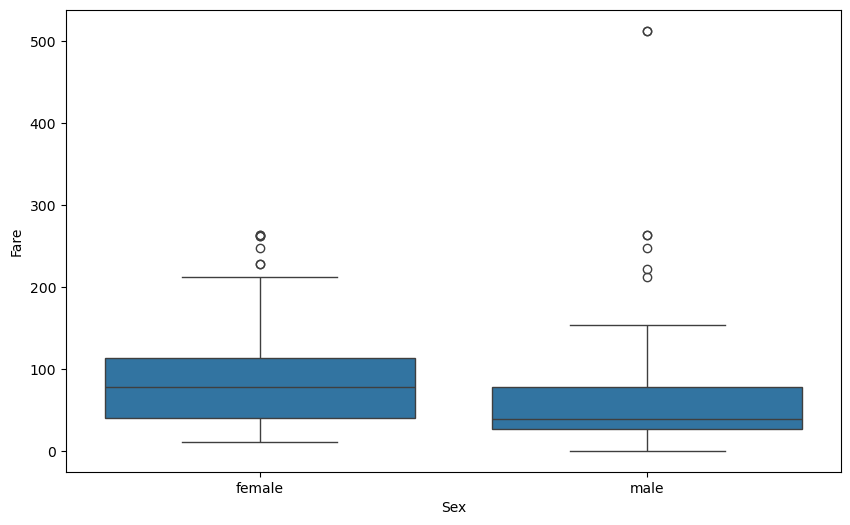

In [13]:
plt.figure(figsize=(10,6))
sns.boxplot(x="Sex",y="Fare",data=dataset)
plt.show()

<h3>conclusion- some males and female pay more fare comes under outliers</h3>
<h3>horizontal line shows median -middle value</h3>


<h2>data processing</h2>

In [14]:
dataset['Sex'].unique()

array(['female', 'male'], dtype=object)

In [15]:
dataset["Survived"].value_counts()

Survived
1    136
0     68
Name: count, dtype: int64

In [16]:
#dataset['Sex'] = dataset['Sex'].replace({'male': 0, 'female': 1})
#dataset['Sex']

In [17]:
dataset["Embarked"].unique()

array(['C', 'S', 'Q'], dtype=object)

In [18]:
dataset['Embarked'] = dataset['Embarked'].replace({'C': 0, 'S': 1, 'Q':2})
dataset['Embarked']

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_7724\4056262631.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset['Embarked'] = dataset['Embarked'].replace({'C': 0, 'S': 1, 'Q':2})


1      0
3      1
6      1
10     1
11     1
      ..
871    1
872    1
879    0
887    1
889    0
Name: Embarked, Length: 204, dtype: int64

In [19]:
dataset.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

<h2>Visualization</h2>

<h2> survival rate based on gender</h2>

In [20]:
dataset["Sex"].value_counts()

Sex
male      107
female     97
Name: count, dtype: int64

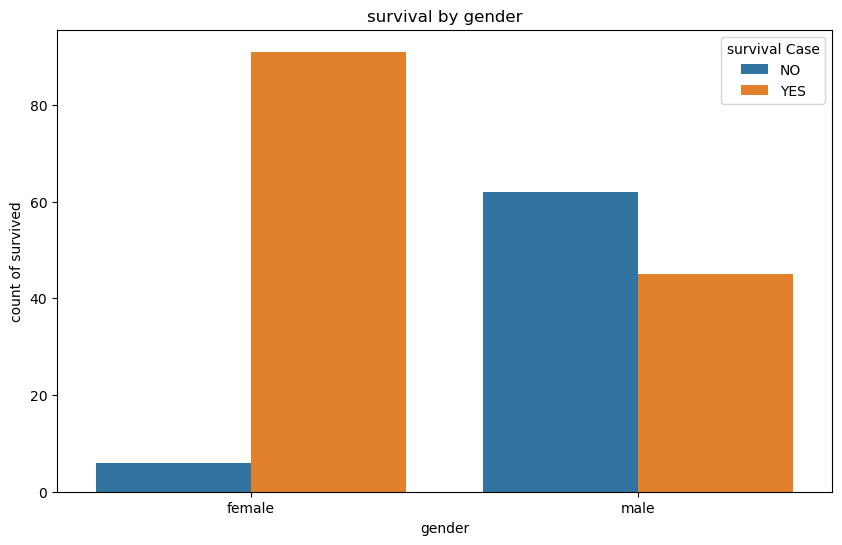

In [21]:

plt.figure(figsize=(10,6))
sns.countplot(x="Sex",hue="Survived",data=dataset)
plt.title("survival by gender")
plt.xlabel("gender")
plt.ylabel("count of survived")
plt.legend(title="survival Case",labels=['NO','YES'])
plt.show()

<h3>female are more survival count</h5>
<h3> male have less survial</h5>

<h2>how does fare vary with class</h2>

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_7724\18730580.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Pclass',y='Fare',data=dataset,palette='Set2')


Text(0, 0.5, 'Fare count')

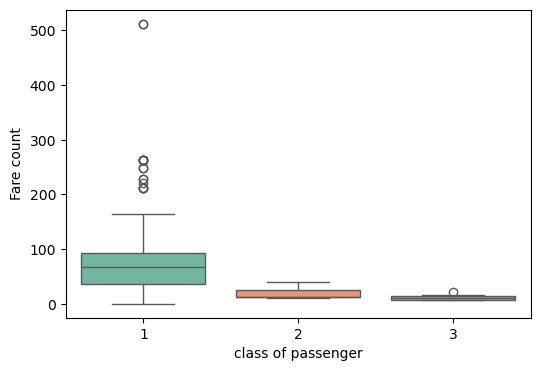

In [22]:
plt.figure(figsize=(6,4))
sns.boxplot(x='Pclass',y='Fare',data=dataset,palette='Set2')
plt.xlabel('class of passenger')
plt.ylabel('Fare count')

<h3>1st class pasenger have gigh fare</h3>
<h3>2nd claass pssenger have moderate fare</h3>
<h3>3rd class pssenger gives less fare</h3>

<h2>lets check age is responsible for men and women diifrently</h2>

In [23]:
#lets make new column
def Age_group(Age):
    if Age < 13:
        return 'Child'
    elif Age < 18:
        return 'Teen'
    elif Age < 30:
        return 'young_Adult'
    elif Age < 50:
        return 'Adult'
    else:
        return 'Senior'

dataset['Age_group'] = dataset['Age'].apply(Age_group)

In [24]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_group
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,0,Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,1,Adult
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,1,Senior
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,1,Child
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,1,Senior


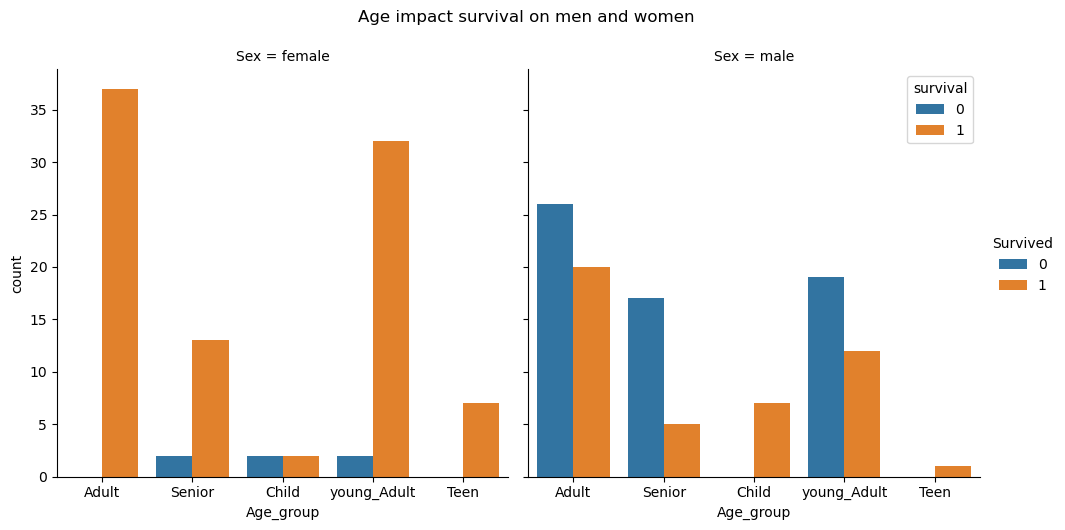

In [25]:
sns.catplot(x="Age_group",hue="Survived",col="Sex",kind="count",data=dataset)
plt.suptitle("Age impact survival on men and women",y=1.05)
plt.xlabel("Age_group")
plt.ylabel("count")
plt.legend(title="survival")
plt.show()


<h3> in above we get that female have more survival than man</h3>
<h3>1..female</h3>
<h3> so the age betwwen 30-50 adult female are more survived</h3>
<h3> adult and teen female are all survived</h3>
<h3>2....male</h3>
<h3> adult male have more survival</h3>
<h3>child and teen male are all survived</h3>

<h2>age vs fare<h2>

Text(0.5, 0, 'Age of passengers')

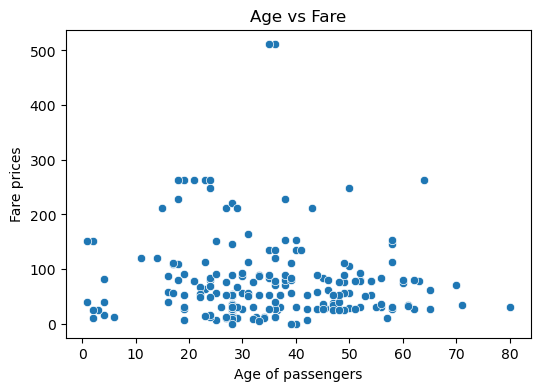

In [26]:
plt.figure(figsize=(6,4))
sns.scatterplot(x='Age',y='Fare',data=dataset)
plt.title('Age vs Fare')
plt.ylabel('Fare prices')
plt.xlabel("Age of passengers")

<h3>in upper we get adult  male and female are more survival </h3>
<h3>so here we get that age between 30 to 50 people gives more fare</h3>

<h2>here we see which combination has more survival</h2>

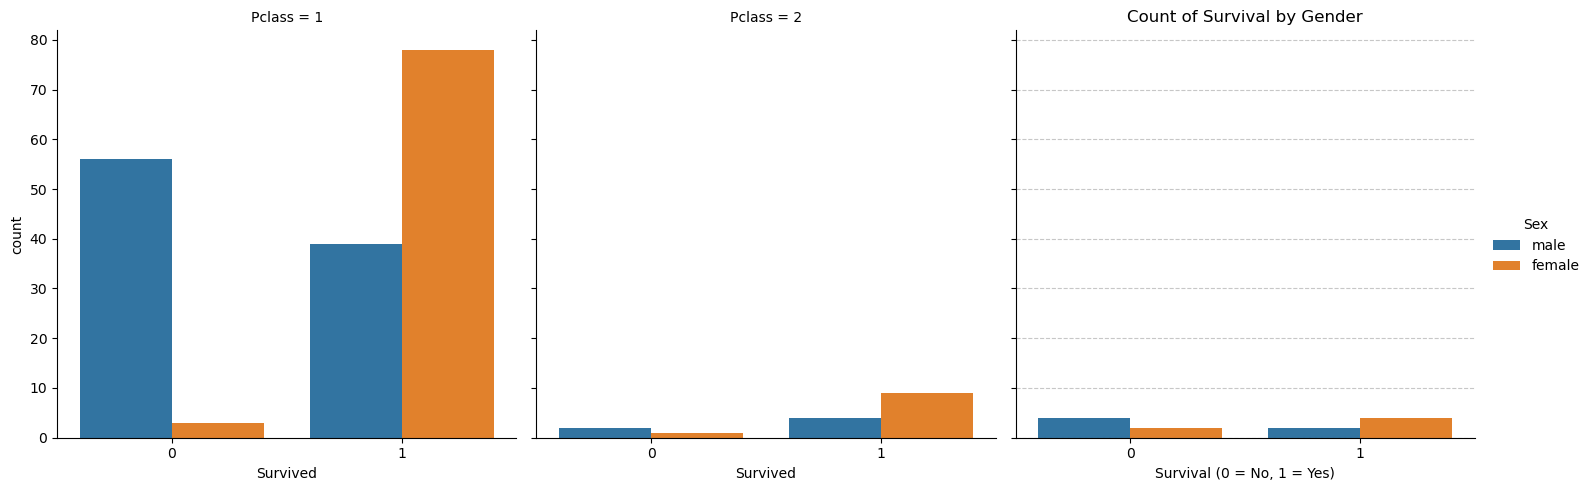

In [27]:
sns.catplot(x='Survived', hue='Sex',col='Pclass',kind='count' ,data=dataset)
plt.title('Count of Survival by Gender')
plt.xlabel('Survival (0 = No, 1 = Yes)')
plt.ylabel('Count of Passengers')
plt.grid(True ,axis='y', linestyle='--', alpha=0.7)
plt.show()

<h3>1..in all pclas 1,pclass2,pclass2</h3>
<h3>female has more survival</h3>

<h2>correlativity</h3>

In [28]:
dataset['Sex'] = dataset['Sex'].replace({'male': 0, 'female': 1})
dataset['Sex']

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_7724\3293432407.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset['Sex'] = dataset['Sex'].replace({'male': 0, 'female': 1})


1      1
3      1
6      0
10     1
11     1
      ..
871    1
872    0
879    1
887    1
889    0
Name: Sex, Length: 204, dtype: int64

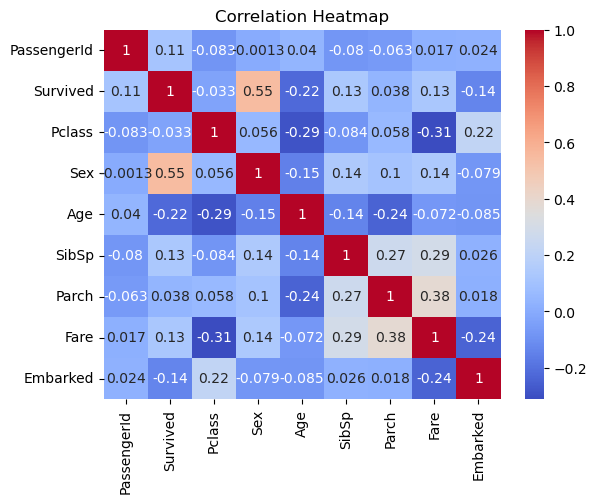

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
corr_data = dataset.corr(numeric_only=True)
sns.heatmap(corr_data, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

<h4>conclusion- gender,fare,pclass are strong predictor of servival</h4>
<h4>gender and surviaval have strong correlation</h4> 
<h4>survival and fare -higher fare higher chance of survival</h4>
<h4>pclass nd servial me 3rd class ke servival kam tha</h4>
<h4>age vs survival correlation have weak correlation</h4>

<h2 style="color:blue">model building:Logistic Regression<h2>

<h2>select algorithm</h2

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import  accuracy_score,confusion_matrix,classification_report,roc_curve,roc_auc_score
from sklearn.model_selection import train_test_split

In [31]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 204 entries, 1 to 889
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  204 non-null    int64  
 1   Survived     204 non-null    int64  
 2   Pclass       204 non-null    int64  
 3   Name         204 non-null    object 
 4   Sex          204 non-null    int64  
 5   Age          204 non-null    float64
 6   SibSp        204 non-null    int64  
 7   Parch        204 non-null    int64  
 8   Ticket       204 non-null    object 
 9   Fare         204 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     204 non-null    int64  
 12  Age_group    204 non-null    object 
dtypes: float64(2), int64(7), object(4)
memory usage: 22.3+ KB


<h2>feature selection</h2>

In [33]:
x=dataset[["Fare","SibSp","Sex"]]
type(x)

pandas.core.frame.DataFrame

In [34]:
y=dataset["Sex"]

<h2>data validation</h2>

In [35]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

<h2>model preparation</h2>

In [36]:
model_ls=LogisticRegression(max_iter=10000)

<h2>model fitting</h2>

In [37]:
model_ls.fit(x_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,10000
,multi_class,'deprecated'


<h2>model evolution by prediction</h2>

In [38]:
y_predict=model_ls.predict(x_test)

In [39]:
accuracy=accuracy_score(y_test,y_predict)
print( "accuracy=" ,accuracy*100)

accuracy= 100.0


In [40]:
conf_matrix=confusion_matrix(y_test,y_predict)
print("\nconfusion matrix-\n",conf_matrix)


confusion matrix-
 [[30  0]
 [ 0 32]]


In [41]:
class_report=classification_report(y_test,y_predict)
print(" \nclassification_report-\n",class_report)

 
classification_report-
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       1.00      1.00      1.00        32

    accuracy                           1.00        62
   macro avg       1.00      1.00      1.00        62
weighted avg       1.00      1.00      1.00        62



<h2>user prediction from model</h3>


In [42]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 204 entries, 1 to 889
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  204 non-null    int64  
 1   Survived     204 non-null    int64  
 2   Pclass       204 non-null    int64  
 3   Name         204 non-null    object 
 4   Sex          204 non-null    int64  
 5   Age          204 non-null    float64
 6   SibSp        204 non-null    int64  
 7   Parch        204 non-null    int64  
 8   Ticket       204 non-null    object 
 9   Fare         204 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     204 non-null    int64  
 12  Age_group    204 non-null    object 
dtypes: float64(2), int64(7), object(4)
memory usage: 22.3+ KB


In [43]:
user_input={
    "Fare":[float(input("enter your fare"))],
    "SibSp":[int(input("enter no of your spouse"))],
    "Sex":[int(input("enter your gender"))]
}
user_dataset=pd.DataFrame(user_input)
    

enter your fare 7.2500
enter no of your spouse 1
enter your gender 0


In [44]:
pred_user=model_ls.predict(user_dataset)
print("surrvived",pred_user)

surrvived [0]
